In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [9]:
#importing dataset
df = pd.read_csv('car_evaluation.csv')
col_names =['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
len(df)

1727

In [10]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,more,med,high,unacc
freq,432,432,432,576,576,576,1209


In [11]:
for col in col_names:
    print(df[col].value_counts())

high     432
med      432
low      432
vhigh    431
Name: buying, dtype: int64
high     432
med      432
low      432
vhigh    431
Name: maint, dtype: int64
3        432
5more    432
4        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
med      576
big      576
small    575
Name: lug_boot, dtype: int64
high    576
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [12]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [28]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['buying_'] = le.fit_transform(df.buying)
df['maint_'] = le.fit_transform(df.maint)
df['doors_'] = le.fit_transform(df.doors)
df['persons_'] = le.fit_transform(df.persons)
df['lug_boot_'] = le.fit_transform(df.lug_boot)
df['safety_'] = le.fit_transform(df.safety)
df.drop(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],inplace=True,axis=1)
df.head()

,class,buying_,maint_,doors_,persons_,lug_boot_,safety_
0,unacc,3,3,0,0,2,2
1,unacc,3,3,0,0,2,0
2,unacc,3,3,0,0,1,1
3,unacc,3,3,0,0,1,2
4,unacc,3,3,0,0,1,0


In [30]:
#creating input and target
x = df.drop('class',axis=1)
y=df['class']

In [52]:
#splitting data into test and training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [53]:
#fitting the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini',max_depth=7)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [54]:
#testing model accuracy
model.score(X_test,y_test)

0.9171483622350675

In [55]:
#predicting using test dataset
y_predict = model.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_predict)))

Model accuracy score with criterion gini index: 0.9171


In [59]:
y_pred_train_gini = model.predict(X_train)

y_pred_train_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'vgood', 'unacc'],
      dtype=object)

In [60]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9329


[Text(372.3576923076923, 407.7, 'X[3] <= 0.5\ngini = 0.459\nsamples = 1208\nvalue = [269, 51, 844, 44]'),
 Text(355.1884615384615, 353.34000000000003, 'gini = 0.0\nsamples = 405\nvalue = [0, 0, 405, 0]'),
 Text(389.5269230769231, 353.34000000000003, 'X[5] <= 0.5\ngini = 0.582\nsamples = 803\nvalue = [269, 51, 439, 44]'),
 Text(233.93076923076922, 298.98, 'X[1] <= 2.5\ngini = 0.632\nsamples = 268\nvalue = [144, 23, 57, 44]'),
 Text(124.47692307692307, 244.62, 'X[0] <= 0.5\ngini = 0.611\nsamples = 204\nvalue = [115, 23, 22, 44]'),
 Text(51.50769230769231, 190.26, 'X[2] <= 0.5\ngini = 0.065\nsamples = 59\nvalue = [57, 0, 2, 0]'),
 Text(34.33846153846154, 135.89999999999998, 'X[4] <= 1.5\ngini = 0.26\nsamples = 13\nvalue = [11, 0, 2, 0]'),
 Text(17.16923076923077, 81.54000000000002, 'gini = 0.0\nsamples = 9\nvalue = [9, 0, 0, 0]'),
 Text(51.50769230769231, 81.54000000000002, 'X[3] <= 1.5\ngini = 0.5\nsamples = 4\nvalue = [2, 0, 2, 0]'),
 Text(34.33846153846154, 27.180000000000007, 'gini = 

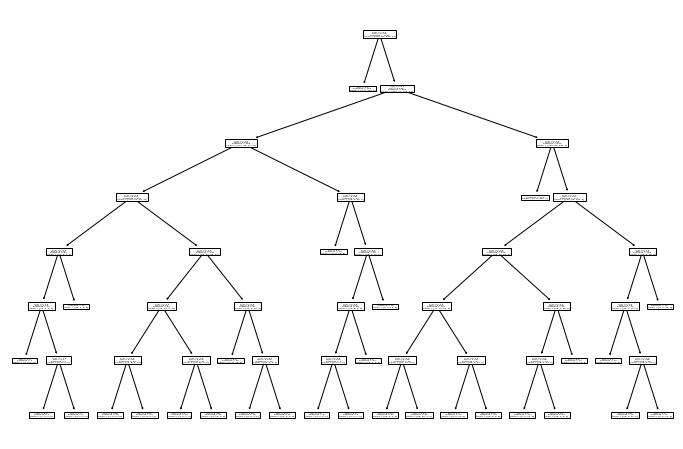

In [61]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(model.fit(X_train, y_train)) 